In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import math
import os

# Load Data

In [6]:
data_path = '../../data/stocks/processed/'

data_google = pd.read_parquet(os.path.join(data_path, 'GOOGL_data_processed.parquet'))
data_apple = pd.read_parquet(os.path.join(data_path, 'AAPL_data_processed.parquet'))
data_amazon = pd.read_parquet(os.path.join(data_path, 'AMZN_data_processed.parquet'))
data_meta = pd.read_parquet(os.path.join(data_path, 'META_data_processed.parquet'))
data_microsoft = pd.read_parquet(os.path.join(data_path, 'MSFT_data_processed.parquet'))
data_nvidia = pd.read_parquet(os.path.join(data_path, 'NVDA_data_processed.parquet'))
data_tesla = pd.read_parquet(os.path.join(data_path, 'TSLA_data_processed.parquet'))

# Description

In [22]:
print("Column names:", data_google.columns.tolist(), "\n")
print("="*70, "\n")
print("Missing values in the datasets:", 0, "\n")
print("="*70, "\n")
print("Size of the datasets:", data_google.shape, "\n")
print("="*70, "\n")
print("First 5 rows of the datasets:\n", data_google[['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'SMA_20', 'MACD', 'LOG_RETURN', 'ABS_LOG_RETURN', 'VOLATILITY']].head(), "\n")


Column names: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'SMA_10', 'SMA_20', 'SMA_30', 'MIDDLE_BAND', 'UPPER_BAND', 'LOWER_BAND', 'RSI_14', 'MACD', 'MACD_SIGNAL', 'MACD_HIST', 'LOG_RETURN_HIGH', 'LOG_RETURN_LOW', 'LOG_RETURN_OPEN', 'LOG_RETURN_CLOSE', 'LOG_RETURN', 'ABS_LOG_RETURN', 'VOLATILITY', 'DAY_OF_WEEK', 'DAY_OF_WEEK_SIN', 'DAY_OF_WEEK_COS', 'MONTH', 'MONTH_SIN', 'MONTH_COS', 'DAY_OF_MONTH', 'DAY_OF_MONTH_SIN', 'DAY_OF_MONTH_COS', 'QUARTER', 'QUARTER_SIN', 'QUARTER_COS'] 


Missing values in the datasets: 0 


Size of the datasets: (2482, 35) 


First 5 rows of the datasets:
         Date      Close       High        Low       Open    Volume     SMA_20  \
0 2015-02-20  26.904440  27.191460  26.720708  27.191460  38234000  26.564036   
1 2015-02-23  26.566769  26.780296  26.417796  26.765399  32906000  26.546780   
2 2015-02-24  26.748016  26.785258  26.368135  26.395447  28406000  26.551572   
3 2015-02-25  27.179045  27.290277  26.716235  26.737590  40836000  26.616474 

# PLOTS

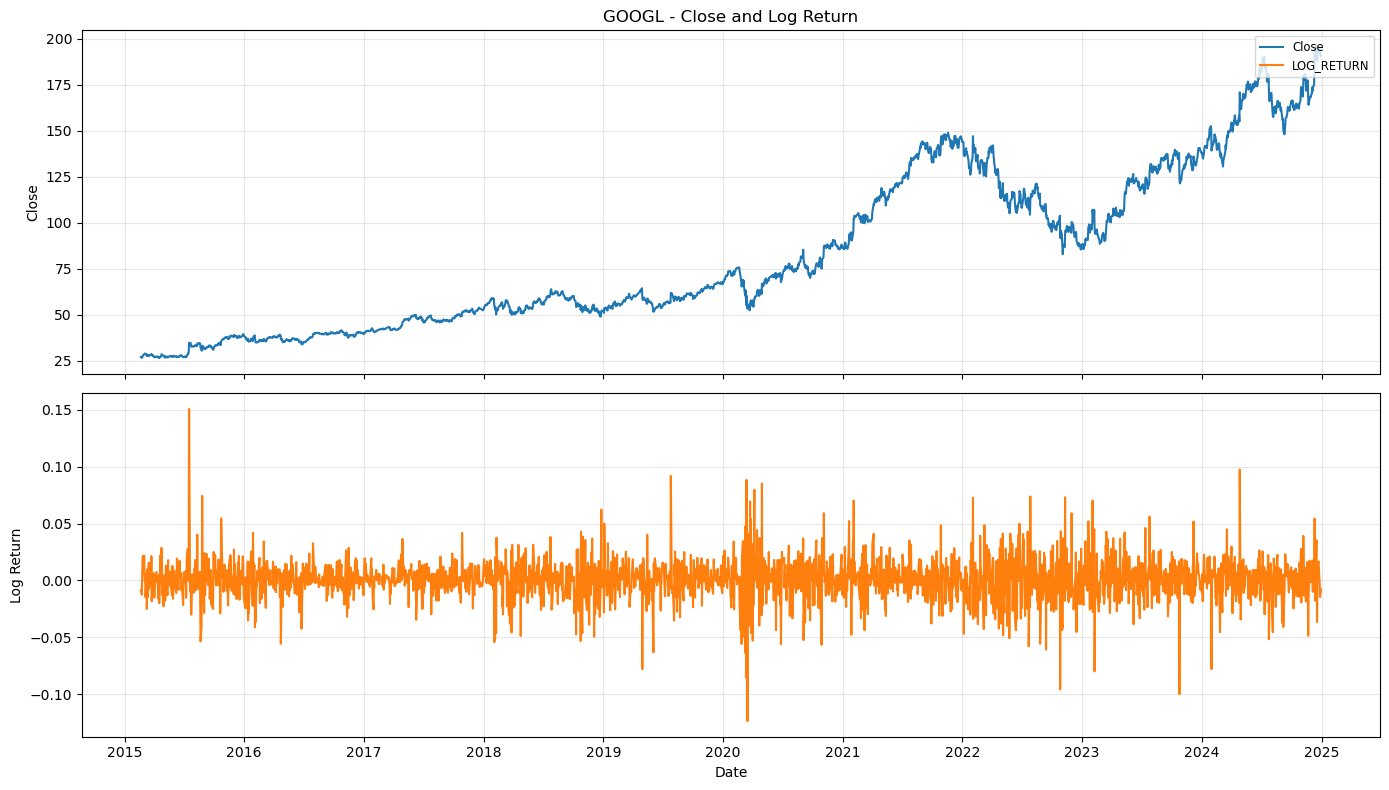

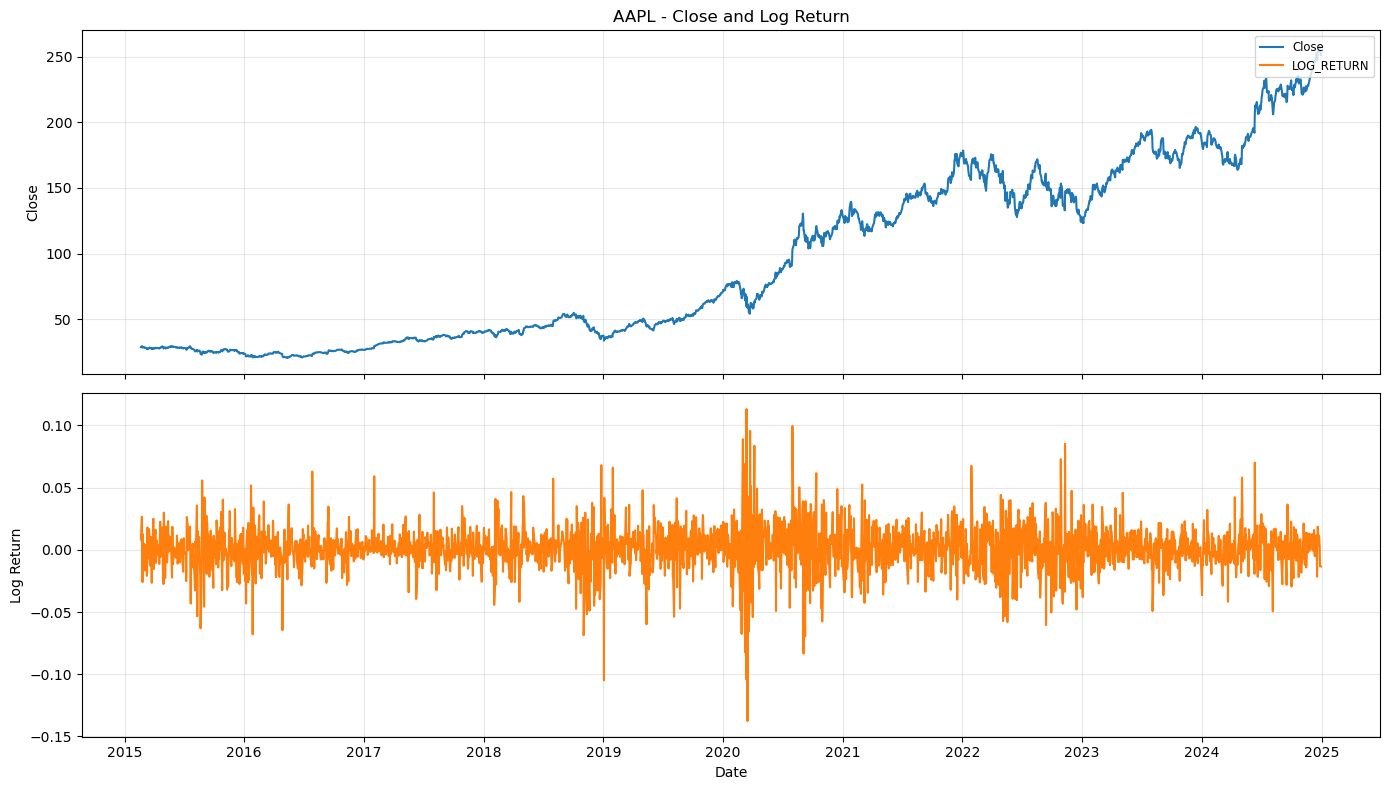

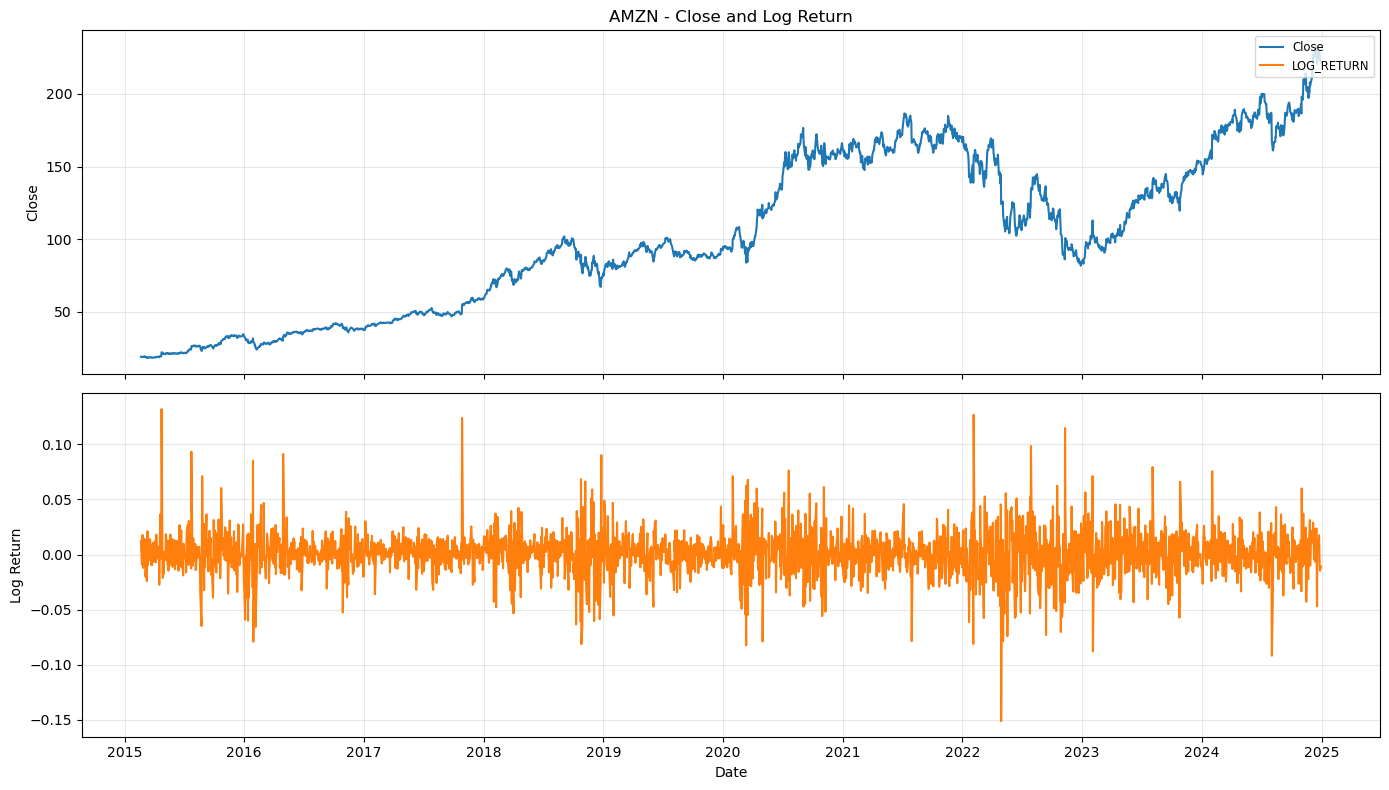

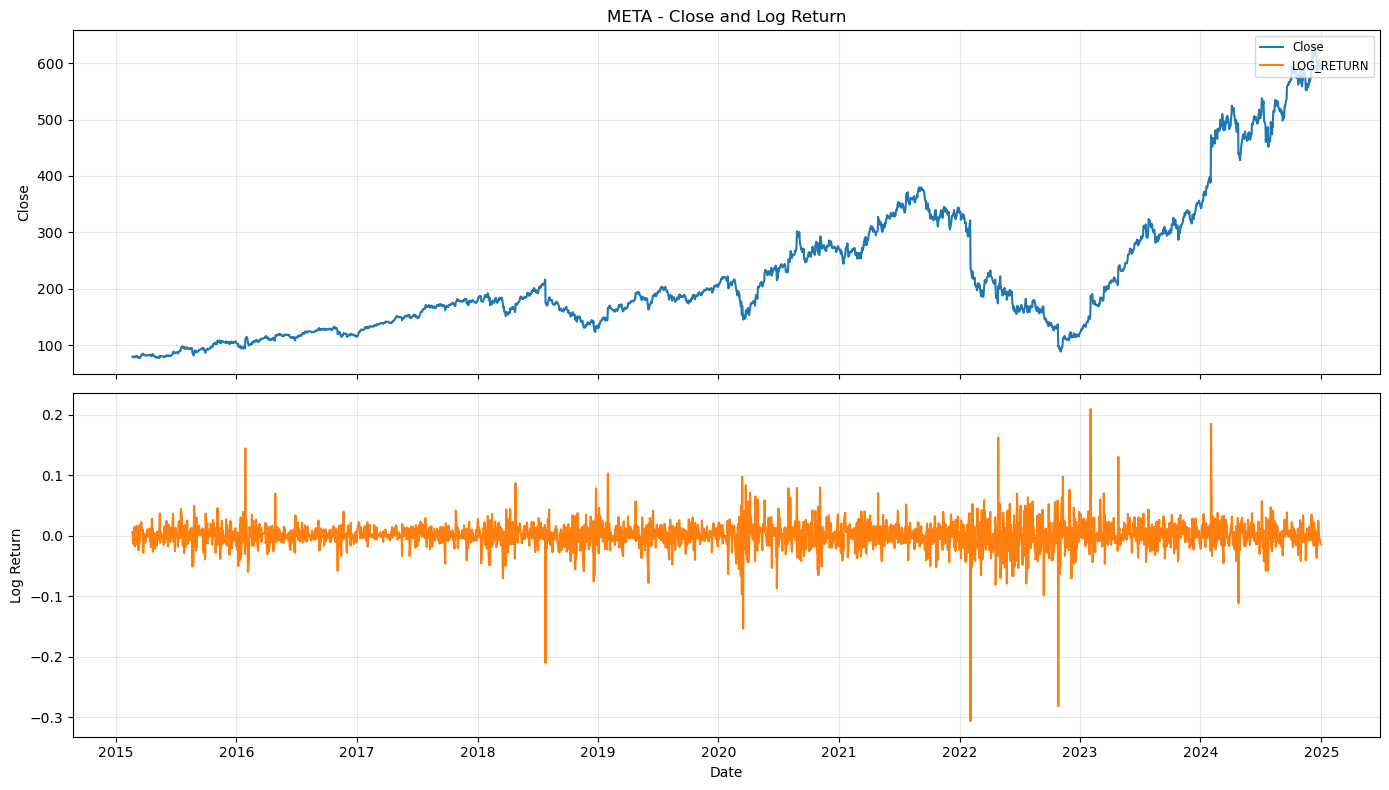

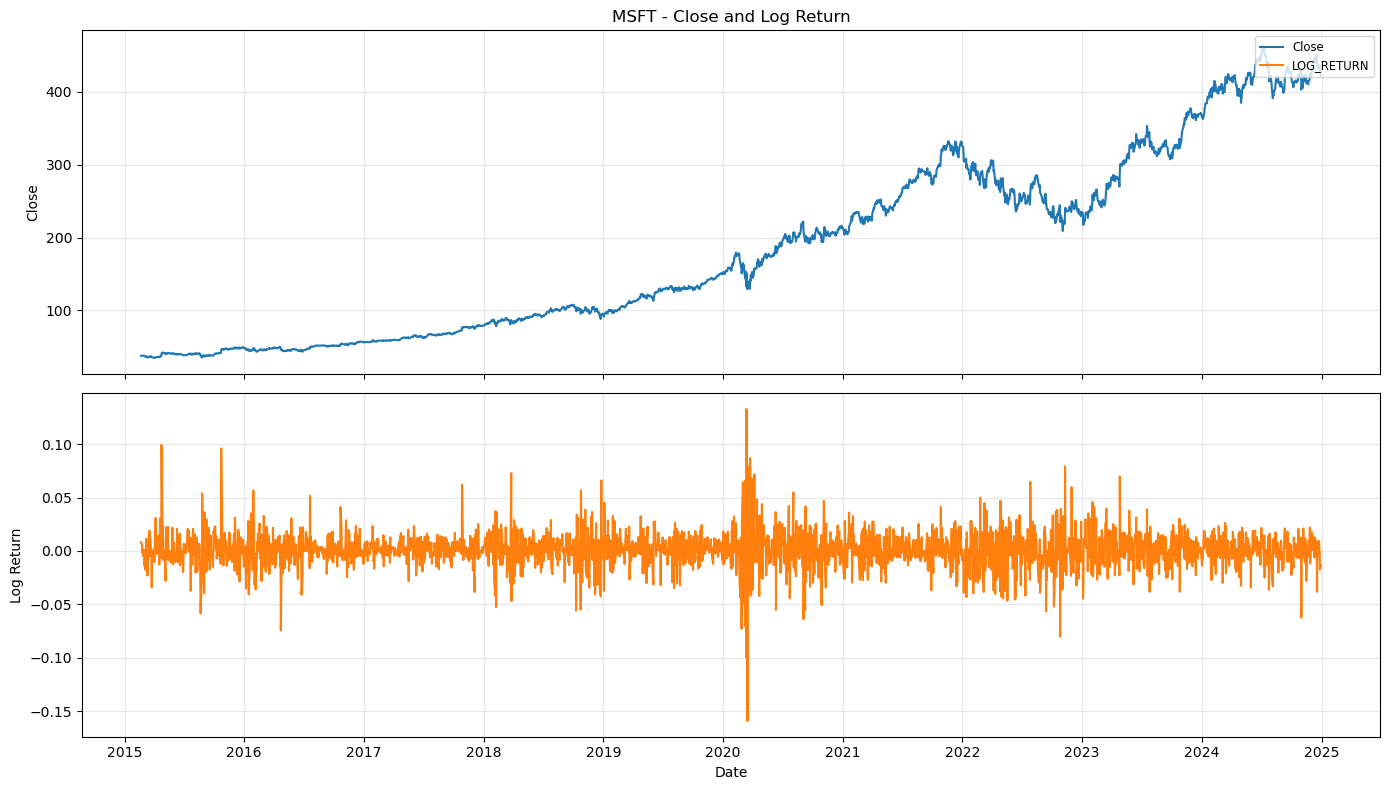

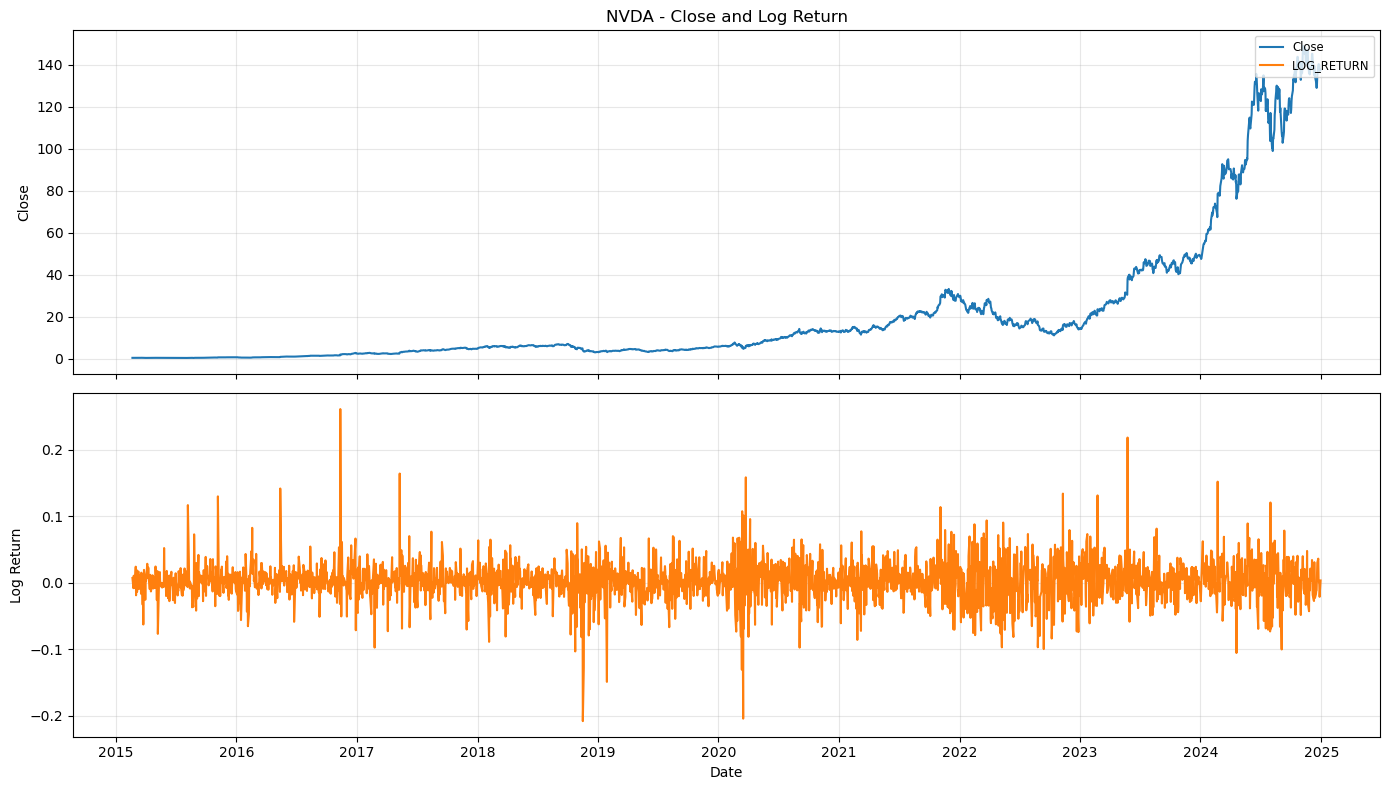

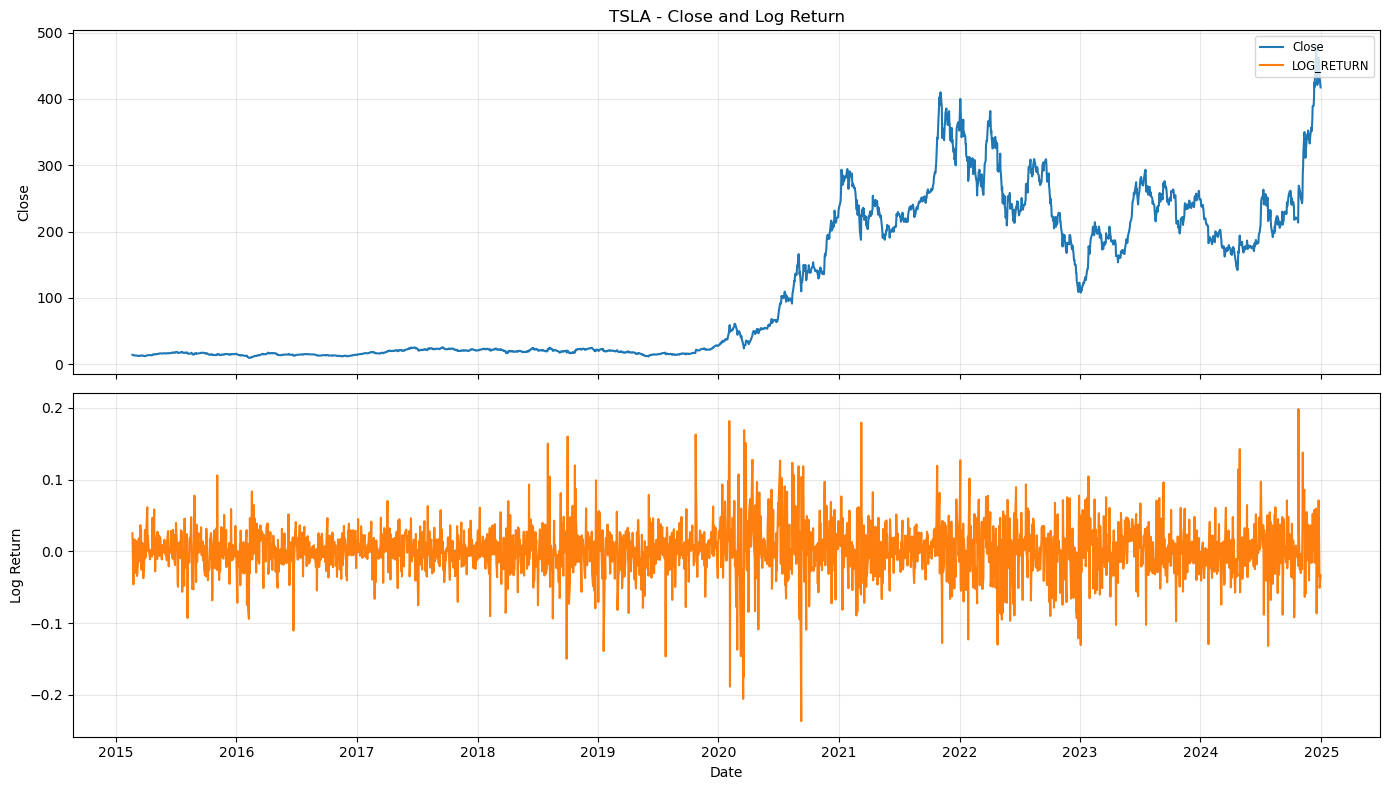

In [27]:
def plot_each_ticker_two_panels(stock_dict, save_dir='plots/stocks'):
    """For each ticker create one figure with 2 stacked subplots:
       - top: Close
       - bottom: LOG_RETURN
       Saves each figure to save_dir/{TICKER}_close_logreturn.png
    """
    if not os.path.exists(save_dir):
        os.makedirs(save_dir, exist_ok=True)

    for ticker, df in stock_dict.items():
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

        x = df['Date'] if 'Date' in df.columns else df.index

        # Top: Close
        if 'Close' in df.columns:
            ax1.plot(x, df['Close'], label='Close', color='tab:blue')
        else:
            ax1.text(0.5, 0.5, 'Close not found', ha='center')
        ax1.set_ylabel('Close')
        ax1.set_title(f'{ticker} - Close and Log Return')
        ax1.grid(True, alpha=0.3)

        # Bottom: LOG_RETURN
        if 'LOG_RETURN' in df.columns:
            ax2.plot(x, df['LOG_RETURN'], label='LOG_RETURN', color='tab:orange')
        else:
            ax2.text(0.5, 0.5, 'LOG_RETURN not found', ha='center')
        ax2.set_ylabel('Log Return')
        ax2.set_xlabel('Date')
        ax2.grid(True, alpha=0.3)

        # Legends
        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        handles = h1 + h2
        labels = l1 + l2
        if handles:
            ax1.legend(handles, labels, loc='upper right', fontsize='small')

        fig.tight_layout()

        # Save and show
        plt.show()
        plt.close(fig)


stock_data = {
    'GOOGL': data_google,
    'AAPL': data_apple,
    'AMZN': data_amazon,
    'META': data_meta,
    'MSFT': data_microsoft,
    'NVDA': data_nvidia,
    'TSLA': data_tesla
}

# Create one figure per ticker with two plots and save
plot_each_ticker_two_panels(stock_data, save_dir='plots/stocks')